# Extraindo as Letras da Discografia do Niall Horan

Niall James Horan (Mullingar, 13 de setembro de 1993), mais conhecido como Niall Horan é um cantor e compositor irlandês. Ele ficou conhecido como membro da *boyband* One Direction. Em 2010, Horan fez o teste como competidor solo na competição britânica *The X Factor*. Depois de serem eliminados como artistas solo, Horan, Zayn Malik, Liam Payne, Harry Styles e Louis Tomlinson foram reunidos em uma banda.

Após o hiato da banda em 2016, Horan assinou um contrato como artista solo com a *Capitol Records*. Seus singles *This Town* e *Slow Hands* de seu primeiro álbum de estúdio, *Flicker* (2017) alcançaram o top 20 em vários países. O álbum estreou no número um na Irlanda e nos Estados Unidos, além de figurar entre os três primeiros na Austrália e no Reino Unido. Ele embarcou na turnê *Flicker Sessions* (2017) e na *Flicker World Tour* (2018) em suporte ao álbum. O segundo álbum de estúdio de Horan, *Heartbreak Weather*, foi lançado em 13 de março de 2020 e estreou no número quatro nos Estados Unidos e número um no Reino Unido, Irlanda e México.

Mais informações no link: https://pt.wikipedia.org/wiki/Niall_Horan

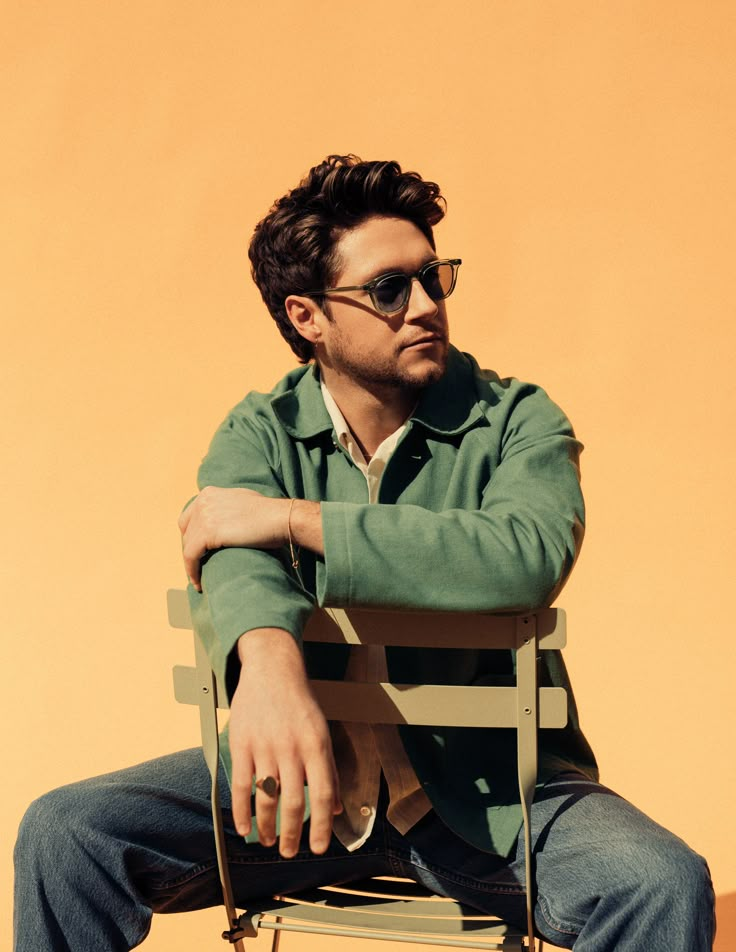

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

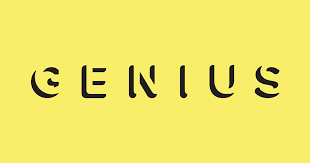

In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Niall Horan", max_songs=50)

Searching for songs by Niall Horan...

Song 1: "Slow Hands"
Song 2: "This Town"
Song 3: "Too Much to Ask"
Song 4: "Flicker"
Song 5: "Nice to Meet Ya"
Song 6: "Put a Little Love on Me"
Song 7: "Heaven"
Song 8: "Black And White"
Song 9: "On the Loose"
Song 10: "Seeing Blind"
Song 11: "Heartbreak Weather"
Song 12: "Still"
Song 13: "Mirrors"
Song 14: "Paper Houses"
Song 15: "No Judgement"
Song 16: "On My Own"
Song 17: "You and Me"
Song 18: "Small Talk"
Song 19: "The Show"
Song 20: "Dear Patience"
Song 21: "Since We’re Alone"
Song 22: "Everywhere"
Song 23: "Fire Away"
Song 24: "The Tide"
Song 25: "Cross Your Mind"
Song 26: "Arms of a Stranger"
Song 27: "Meltdown"
Song 28: "Champagne Lovers"
Song 29: "Bend the Rules"
Song 30: "San Francisco"
Song 31: "Science"
Song 32: "You Could Start A Cult"
Song 33: "So Long"
Song 34: "Never Grow Up"
Song 35: "New Angel"
Song 36: "Finally Free"
Song 37: "Must Be Love"
Song 38: "If You Leave Me"
Song 39: "Wasted"
Song 40: "Save My Life"
Song 41: "On A Nigh

In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_NiallHoran.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_NiallHoran.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'iq', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Classificando as músicas pelo álbum
df_oficial['Album'] = df['album'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminando músicas que não pertencem aos álbuns oficiais
df_oficial = df_oficial.drop(index=[27, 38, 46, 47])

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,Album,release_year
0,Slow Hands,"[Intro]\n(Woo)\n\n[Verse 1]\n""We should take t...",2017-05-04,Flicker (Target Exclusive/Japanese Edition),2017
1,This Town,[Verse 1]\nWaking up to kiss you and nobody’s ...,2016-09-29,Flicker (Target Exclusive/Japanese Edition),2016
2,Too Much to Ask,[Verse 1]\nWaitin' here for someone\nOnly yest...,2017-09-15,Flicker (Target Exclusive/Japanese Edition),2017
3,Flicker,[Verse 1]\nWhen you feel your love's been take...,2017-10-20,Flicker (Target Exclusive/Japanese Edition),2017
4,Nice to Meet Ya,"[Verse 1]\nI like the way you talk, I like the...",2019-10-04,Heartbreak Weather 5,2019
5,Put a Little Love on Me,"[Verse 1]\nWe fight, we get high holdin' on to...",2019-12-06,Heartbreak Weather 5,2019
6,Heaven,[Verse 1]\nStrange light revolves around you\n...,2023-02-17,The Show: The Encore,2023
7,Black And White,"[Verse 1]\nThat first night, we were standin' ...",2020-03-13,Heartbreak Weather 5,2020
8,On the Loose,"[Verse 1]\nI know what she's like, she's out o...",2017-10-20,Flicker (Target Exclusive/Japanese Edition),2017
9,Seeing Blind,"[Verse 1: Niall Horan, Niall Horan & Maren Mo...",2017-10-20,Flicker (Target Exclusive/Japanese Edition),2017


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("NiallHoranLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('NiallHoran.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Slow Hands',
  '  take back place that said right face cause want yeah want baby thinkin bout hope feel yeah cause want yeah want baby  slow slow hands like sweat drippin dirty laundry chance that leavin without know yeah already know stoppin your plans those slow hands slow hands  wanna take time could this baby night yeah cause want yeah want baby  slow slow hands like sweat drippin dirty laundry chance that leavin without know yeah already know stoppin your plans those slow hands bridge fingertips puttin show wanna alone take home take home fingertips puttin show tell want baby yeah  slow hands like sweat drippin dirty laundry chance that leavin without know yeah already know stoppin slow hands like sweat drippin dirty laundry chance that leavin without know yeah already know stoppin your plans those slow hands yeah slow hands slow hands',
  '2017-05-04 00:00:00',
  'Flicker (Target Exclusive/Japanese Edition)',
  2017,
  146),
 ('This Town',
  ' waking kiss nobody there smell pe